In [2]:
import pandas as pd
import csv
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud

convert csv file from semicolon delimiter

In [4]:
# Read the original CSV file with semicolon delimiter and latin-1 encoding
with open('list_skincare2_copy3.csv', 'r', encoding='latin-1') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')

    # Create a list to store the converted data
    converted_data = []
    for row in reader:
        # Split each row by semicolon and append it to the converted data list
        converted_row = [cell.strip() for cell in row]
        converted_data.append(converted_row)

# Write the converted data to a new CSV file with comma delimiter
with open('new.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(converted_data)

print("Conversion complete. New CSV file created.")



Conversion complete. New CSV file created.


replace rating format 4,9 to 4.9

In [3]:
df = pd.read_csv('new.csv')

In [6]:
df['rate'] = df['rate'].str.replace(',', '.')
#print(df['rate'])

save it into a new csv file

In [7]:
df.to_csv('new_dataset.csv', index=False)

data visualization

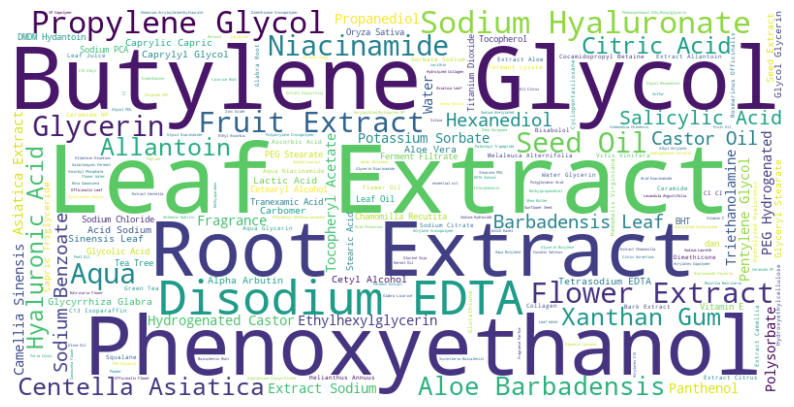

In [6]:
# Concatenate all the ingredients into a single string
all_ingredients = ' '.join(df['ingredients'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: xlabel='suitable_for'>

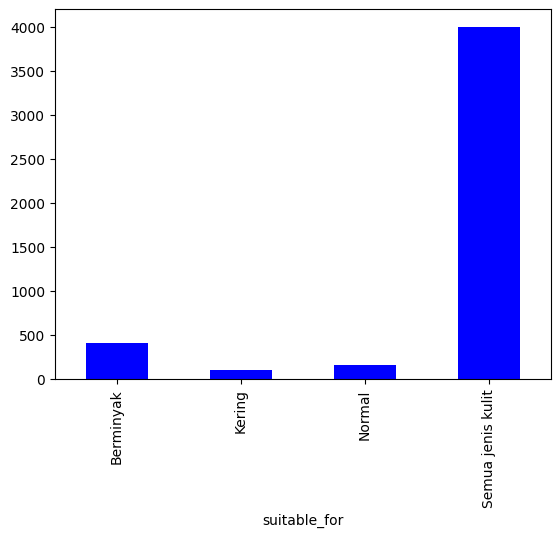

In [5]:
skintype_stats = df.groupby('suitable_for')['product_name'].count()
skintype_stats.plot.bar(color = 'blue')

<Axes: xlabel='rate'>

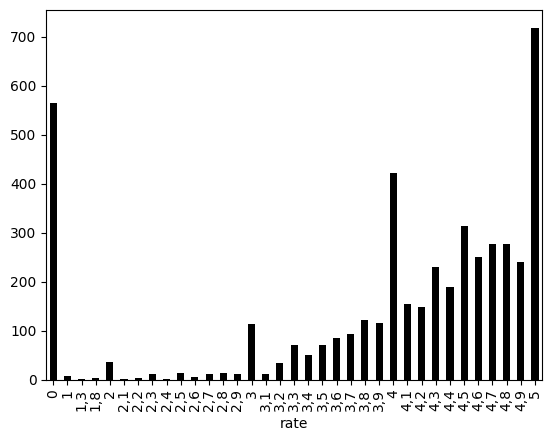

In [10]:
rating_stats = df.groupby('rate')['product_name'].count()
rating_stats.plot.bar(color = 'black')